In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
# Load the ECG dataset
# data = pd.read_csv("ecg.csv")
path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

data = pd.read_csv(path)


In [39]:
data

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,-0.262532,-1.649593,-2.492366,-3.119508,-3.167414,-2.866184,-2.272863,-1.797750,-1.409816,-0.935898,...,0.071168,-0.062821,-0.276300,-0.507968,-0.761527,-0.835386,-0.642892,-0.487950,-0.706754,0.583950
std,1.152563,1.445591,1.386477,1.302936,1.104513,0.906362,0.731666,0.622856,0.636923,0.657822,...,1.404529,1.646210,1.894644,2.059515,2.086289,2.056447,1.859564,1.831162,1.414498,0.492951
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004439,-2.701395,-3.667851,-4.227203,-4.007389,-3.480760,-2.779853,-2.165844,-1.773994,-1.362007,...,-1.088029,-1.588688,-2.147271,-2.731039,-3.031581,-2.868739,-2.155084,-1.658548,-1.596867,0.000000
50%,-0.297583,-1.661891,-2.585872,-3.388020,-3.468898,-2.946908,-2.285430,-1.750063,-1.422461,-0.910449,...,0.658234,0.717676,0.604723,0.333481,-0.030771,-0.202761,-0.194480,-0.160768,-0.568775,1.000000
75%,0.500057,-0.677702,-1.514058,-2.235425,-2.531019,-2.398789,-1.823473,-1.483699,-1.063533,-0.476386,...,1.169415,1.238671,1.264441,1.234413,1.034046,0.945220,0.951666,1.002628,0.271822,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [7]:
data.isnull().sum()

,0
-0.11252183,0
-2.8272038,0
-3.7738969,0
-4.3497511,0
-4.376041,0
...,...
0.22807718,0
0.12343082,0
0.92528624,0
0.19313742,0


In [9]:
data.shape

(4997, 141)

In [11]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(data.values)
y = X  # Autoencoder input and output are the same

X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)


In [21]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]  #141

encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])



In [22]:
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])


In [23]:
autoencoder = models.Sequential([
    encoder,
    decoder
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9060
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4161
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2907
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2641
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2409
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2172
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2066
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1908
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1941
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1781
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1726
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1672
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1642
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1638
Epoch 15/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0

In [24]:
# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [25]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed


In [54]:
# Predict anomalies
anomalies = mse > threshold
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

for i , anamaly in enumerate (anomalies):
  print(i,anamaly)

Number of Anomalies: 50
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 True
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 True
29 False
30 False
31 False
32 True
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 True
74 False
75 False
76 False
77 False
78 False
79 False
80 True
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
1

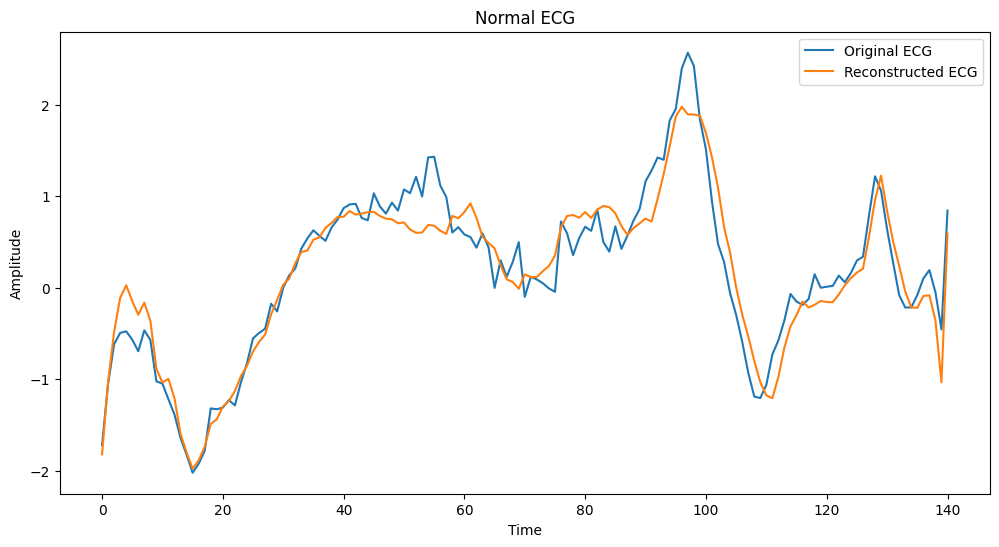

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

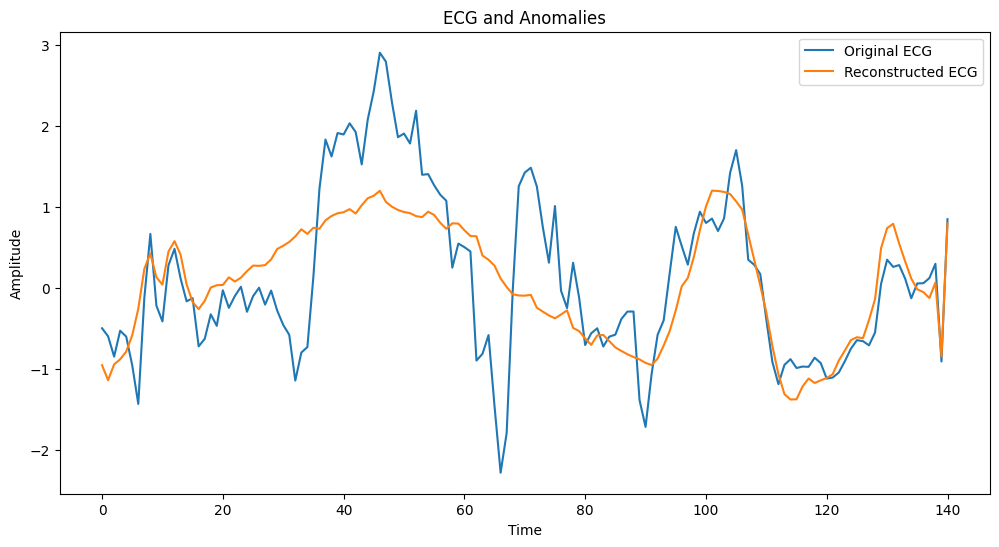

In [59]:
n = 167
anomaly_index = 997
plt.figure(figsize=(12, 6))
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()
